Title of the Project : # Telecom Churn Prediction
<hr>

<img src='https://www.superoffice.com/blog/wp-content/uploads/2015/05/customer-churn-750x400.jpg'> 

<div style='text-align:center;color:gray;font-size:10px'>Photo credit: <a link='https://www.superoffice.com/blog/reduce-customer-churn/'>Superoffice.com</a></div>

Customers are the most important resources for any companies or businesses. What if these customers leave the company due to high charges, better competitor offers, poor customer services or something unknown? Hence, Customer churn rate is one of the important metrics for companies to evaluate their performance.

Churn is a one of the biggest problems in the telecom industry. 
Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%.
churn refers to the number of customers who stop using a company's products or services over a period of time.
Customer churn refers to the percentage of customers who stop using a company’s service during a given timeframe. 
It can happen for various reasons including dissatisfaction with the product, better offers from competitors or changes in customer needs.

Customer churn rate is a KPI to understand the leaving customers. Churn rate represents the percentage of customers that company 
lost over all the customers at the beginning of the interval.

For example, If company had 400 customers at the beginning of the month and only 360 at the end of the month, means company’s churn rate is 10%, because company lost 10% of the customer base. Companies always try to minimize the churn rate to as close as 0%.


Deliverables of the project:

To create a classification filter (Using all classification models and compare their performances) to determine Churn from Telecom dataset. 
Compare the performance of the filters.
Reducing churn is particularly important in competitive industries as acquiring new customers can often be more expensive than retaining existing ones
"churn 0" represents a customer who has not churned (meaning they are still actively using a service), 
while "churn 1" indicates a customer who has churned (stopped using the service)whether or not the customer left the bank. (0=No,1=Yes)
Model will be evaluated by classification/Logistic Regression 

## Table of contents
***************************************

### 1) Introduction
- Dataset, features and target value
- Problem description

### 2) Descriptive analysis and EDA (Exploratory Data Analysis) 
- Churn rate and Correlation between features 
- Profile of Churn vs Existing customers 
- Tenure and Monthly charges distribution

### 3) Cluster analysis 
- Churn cluster detection 
- Churn customer cluster analysis – by Demographic, Account type and Service Usage

### 4) Churn customer prediction model 
- Prediction model process 
- Model evaluation

### 5) Retention plan



In [ ]:
__author__ = "Alok Miglani"
__email__ = "alokmiglani@gmail.com"

## 1. Introduction
<hr>

### Dataset, Features and Target value
Dataset: Source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Main objective here is to analyze churn customers’ behavior and develop strategies to increase customer retention.
Assumption — Here, data source has not provided any information related to time; So I have assumed that all the records are specific to the particular month.

Dataset has information related to,

#### Demographic:

- Gender - Male / Female <br>
- Age range - In terms of Partner, Dependent and Senior Citizen

#### Services:

- Phone service - If customer has Phone service, then services related to Phone like;
    - Multiline Phone service
- Internet Service - If customer has Internet service, then services related to Internet like;
    - Online security
    - Online backup
    - Device protection
    - Tech support
    - Streaming TV
    - Streaming Movies

#### Account type:

- Tenure - How long customer is with the company?
- Contract type - What kind of contract they have with a company? Like
    - Monthly bases
    - On going bases - If on going bases, then One month contract or Two year contract
- Paperless billing - Customer is paperless billion option or not?
- Payment method - What kind of payment method customer has?
    - Mailed check
    - Electronic check
    - Credit card (Automatic)
    - Bank transfer (Automatic)

#### Usage:

- Monthly charges
- Total charges

#### Target:

- Churn - Whether customer left the company or still with the company?

### Problem Description

#### Why customers leaving the company?
The reasons behind the customer leaving company could be 
- High charges 
- Better offer from competitor 
- Poor customer service 
- Some unknown reasons

#### How to detect the churn customer? 
- Monitoring usage 
- Analysing complains 
- Analyzing competitors offers

#### How to prevent customers from leaving a company?
Once you detect high risk customers, apply 
- Retention plans 
- Improve customer service


In [ ]:
Import Libraries

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.svm import SVC
import pickle

Importing Dataset
The data set includes information about:
•	Customers who left within the last month – the column is called Churn
•	Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
•	Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
•	Demographic info about customers – gender, age range, and if they have partners and dependents

Dataset: Source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [3]:
df = pd.read_csv("Telco_Customer_Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Dataset knowledge

In [7]:
df.shape

(7043, 21)

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
# dropping customerID column as this is not required for modelling
df = df.drop(columns=["customerID"])

In [12]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
df["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

In [18]:
for col in df.columns:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
-------

In [19]:
numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [21]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [22]:
len(df[df["TotalCharges"]==" "])

11

In [23]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [24]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [26]:
# checking the class distribution of target column
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Insights:

Customer ID removed as it is not required for modelling
No mmissing values in the dataset
Missing values in the TotalCharges column were replaced with 0
Class imbalance identified in the target

In [27]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Numerical Features - Analysis
Understand the distribution of the numerical features

In [28]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")
  plt.legend()
  plt.show()

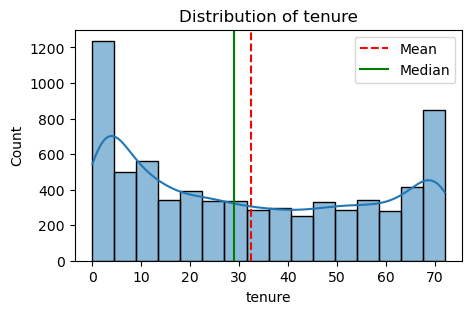

In [29]:
plot_histogram(df, "tenure")

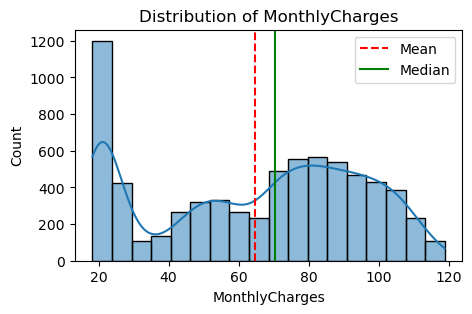

In [30]:
plot_histogram(df, "MonthlyCharges")

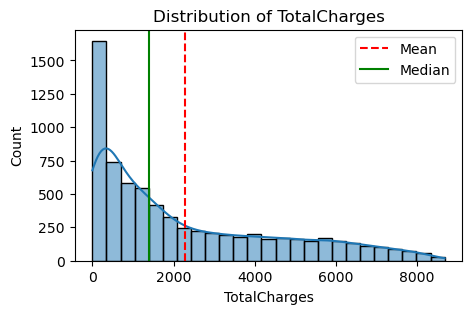

In [31]:
plot_histogram(df, "TotalCharges")

Box Plot for numerical features

In [32]:
def plot_boxplot(df, column_name):
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[column_name])
    plt.title(f"Box Plot of {column_name}")
    plt.ylabel(column_name)
    plt.show()

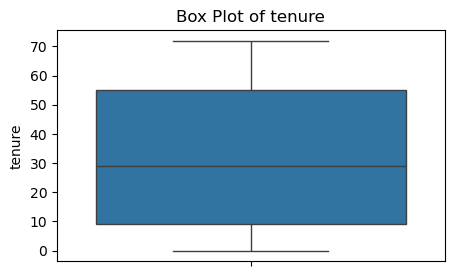

In [33]:
plot_boxplot(df, "tenure")

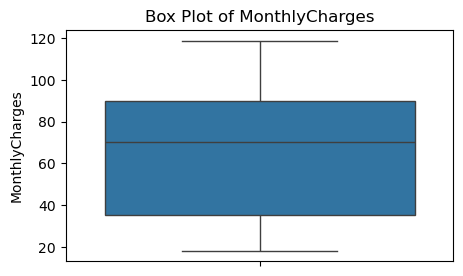

In [34]:
plot_boxplot(df, "MonthlyCharges")

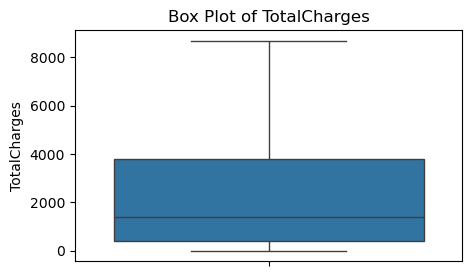

In [35]:
plot_boxplot(df, "TotalCharges")

corelation

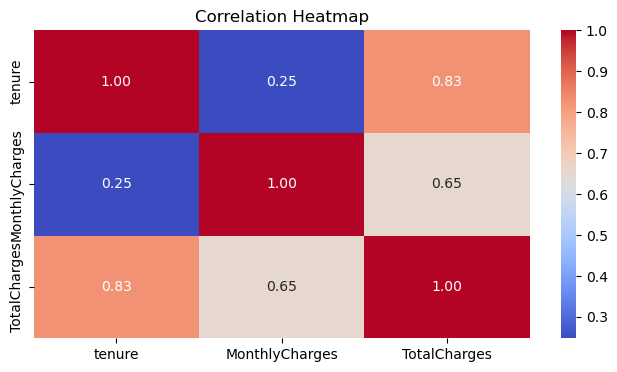

In [36]:
# correlation matrix - heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Categorical features - Analysis

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


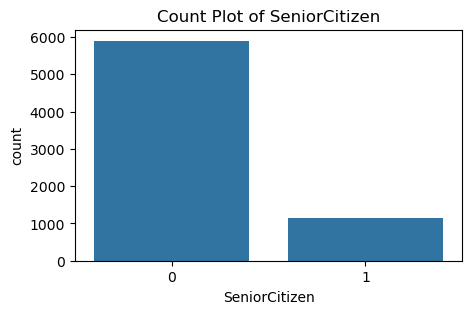

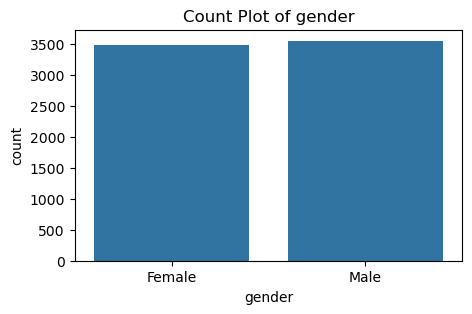

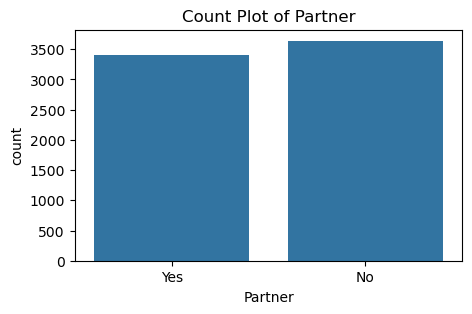

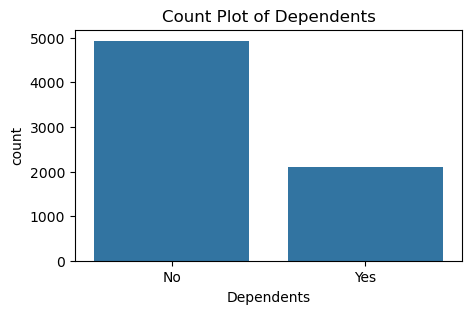

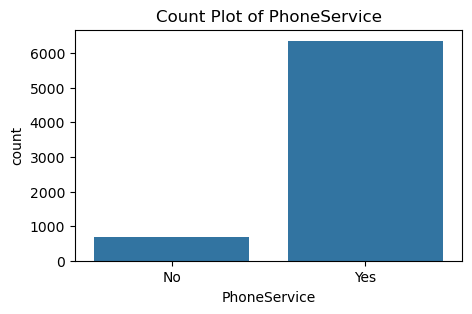

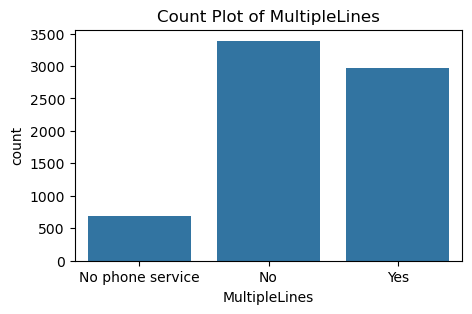

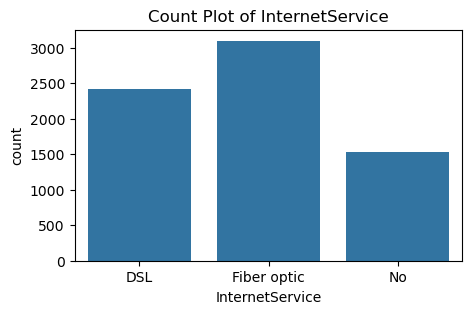

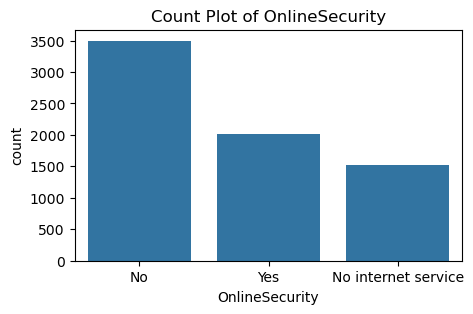

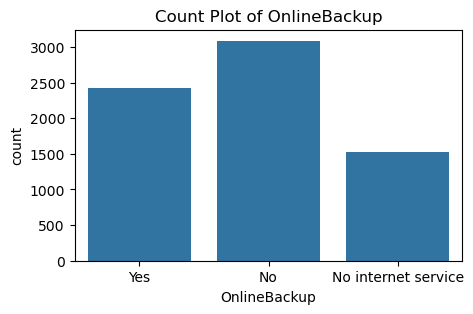

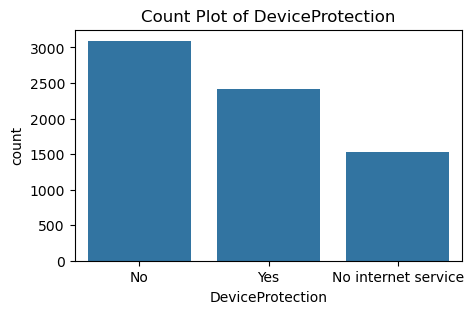

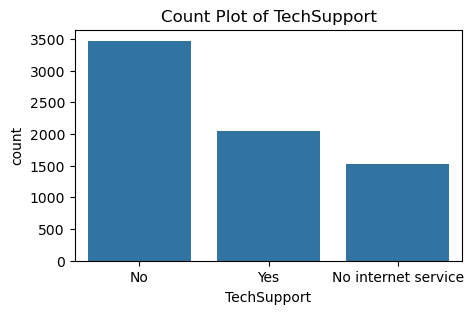

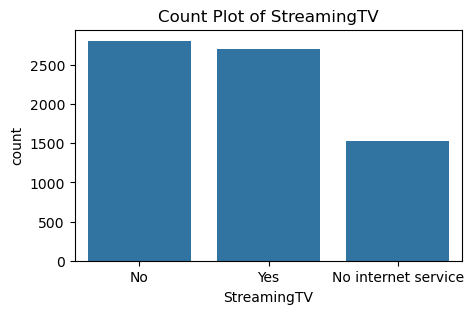

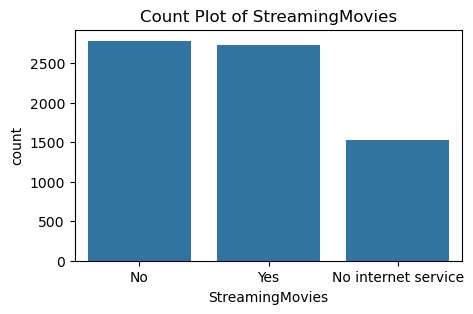

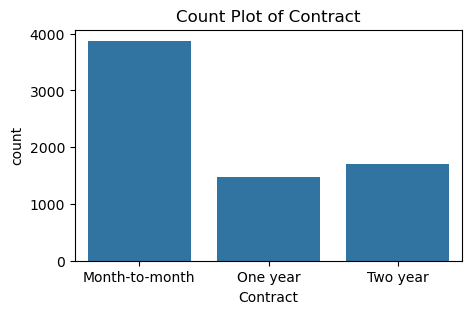

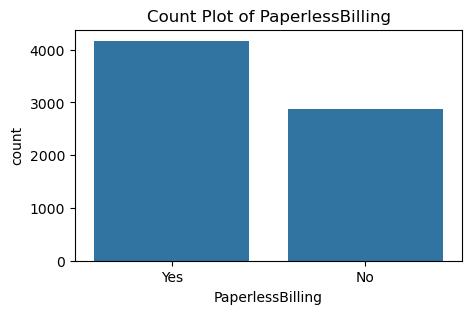

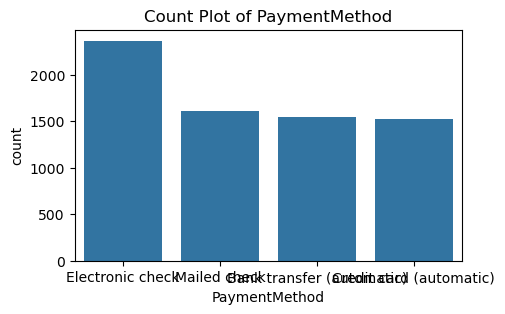

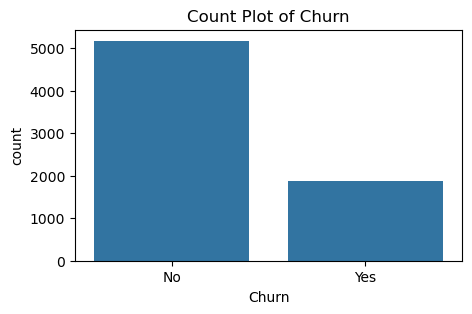

In [38]:
object_cols = df.select_dtypes(include="object").columns.to_list()
object_cols = ["SeniorCitizen"] + object_cols
for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

In [ ]:
Distribution

<Figure size 1600x1200 with 0 Axes>

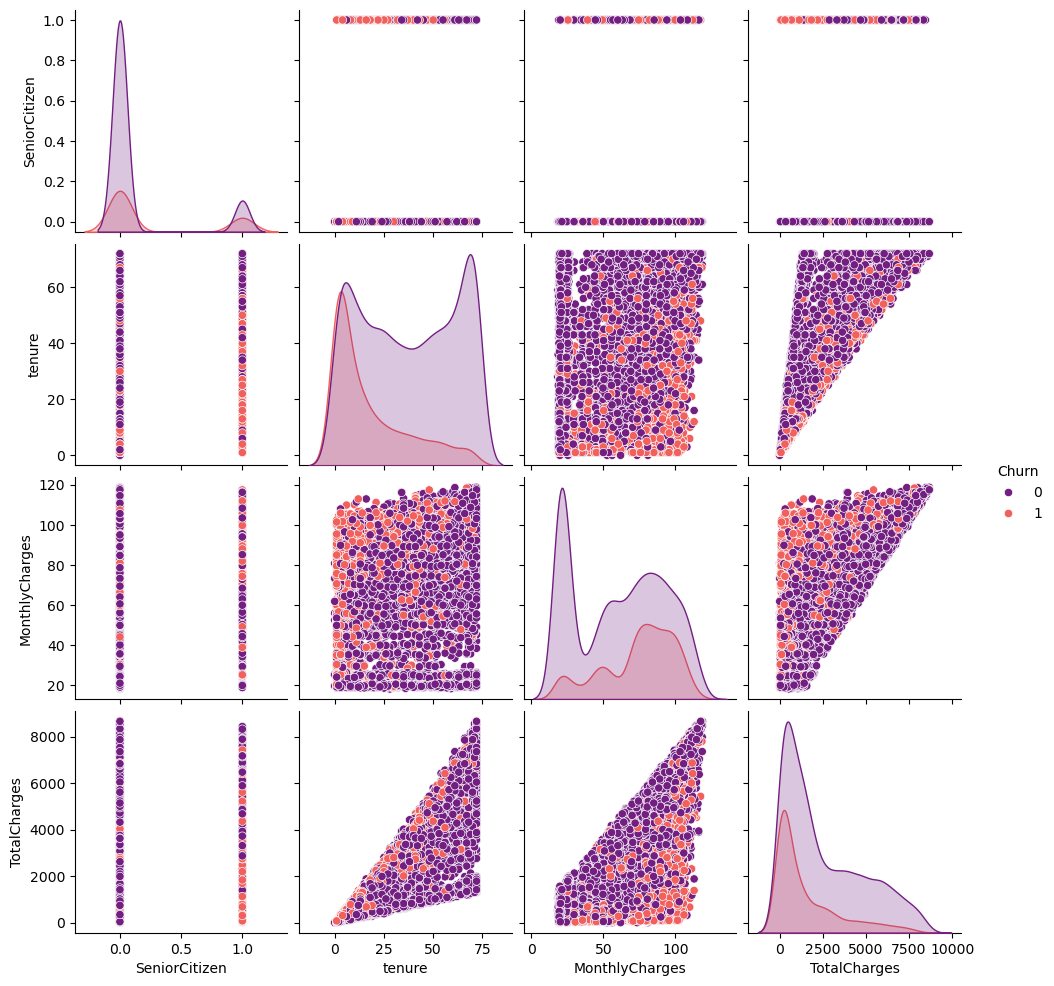

In [46]:
plt.figure(dpi=200, figsize=(8,6))
sns.pairplot(df,hue="Churn",palette="magma")
plt.show()

Churn is high when Monthly Charges are high.
Churn is high at starting tenure and churn is low as tenure increases.

In [47]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

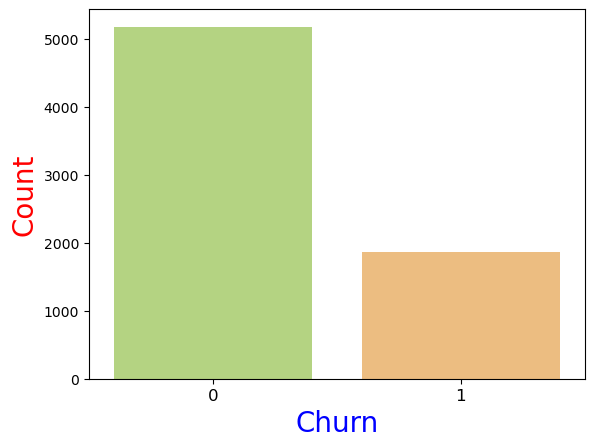

In [48]:
sns.countplot(x= "Churn", data= df, palette= "RdYlGn_r")
plt.xticks(fontsize = 12)
plt.xlabel("Churn", fontsize = 20, c= "b")
plt.ylabel("Count", fontsize = 20, c= "r")
plt.show()             

Here we can see Churn data is imbalance. It shows No churn is high.

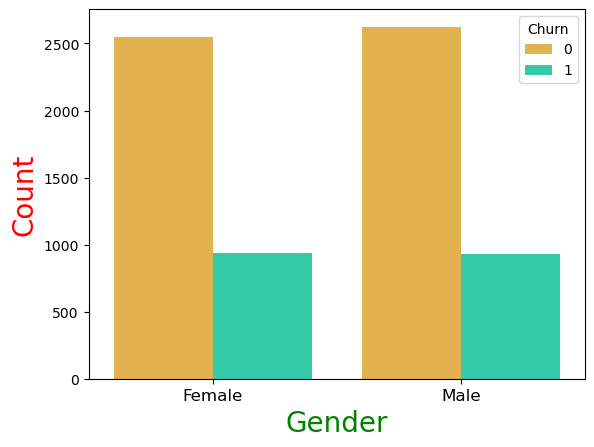

In [49]:
sns.countplot(x= "gender", data= df, hue = "Churn", palette= "turbo_r")
plt.xticks(fontsize = 12)
plt.xlabel("Gender", fontsize = 20, c= "g")
plt.ylabel("Count", fontsize = 20, c= "r")
plt.show()

In [ ]:
Churn in male and female is approximately same whereas in the No-churn male are more than female

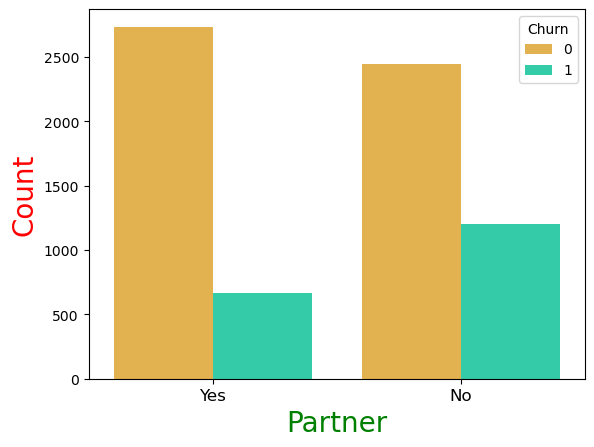

In [50]:
sns.countplot(x="Partner",hue="Churn",palette="turbo_r",data=df)
plt.xticks(fontsize = 12)
plt.xlabel("Partner", fontsize = 20, c= "g")
plt.ylabel("Count", fontsize = 20, c= "r")
plt.show()

People have partners are less churn.

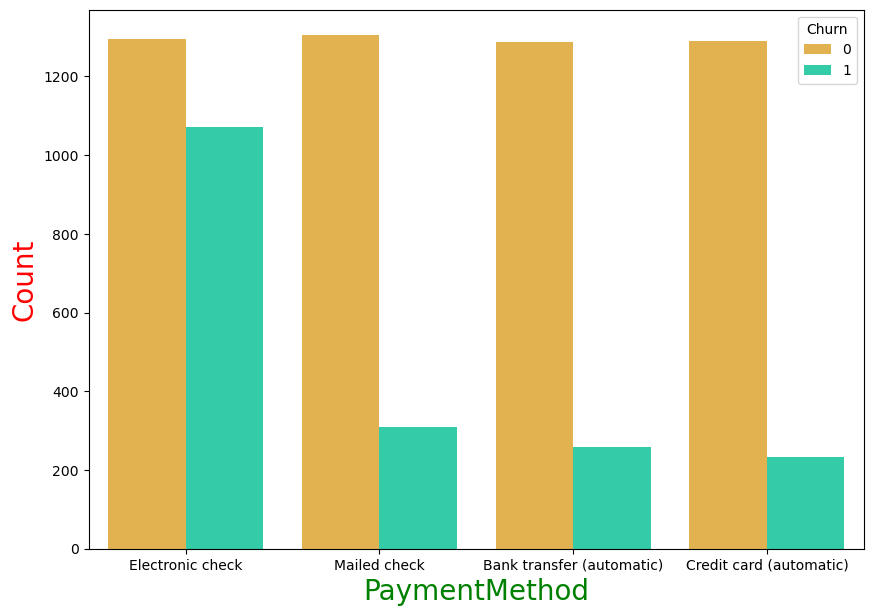

In [51]:
plt.figure(figsize= (10, 7))
sns.countplot(x="PaymentMethod",hue="Churn",palette="turbo_r",data=df)
plt.xticks(fontsize = 10)
plt.xlabel("PaymentMethod", fontsize = 20, c= "g")
plt.ylabel("Count", fontsize = 20, c= "r")
plt.show()

In Electronic check payment have high churn.

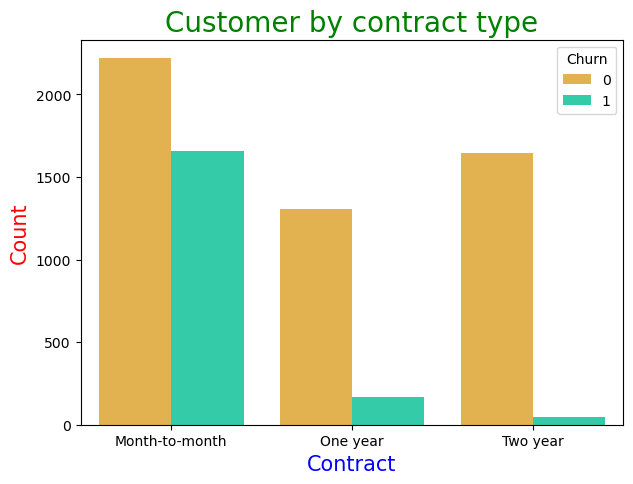

In [52]:
plt.figure(figsize=(7,5))
sns.countplot(x= "Contract", data= df ,palette="turbo_r", hue="Churn")
plt.xlabel("Contract", fontsize= 15, c = "b")
plt.ylabel("Count", fontsize= 15, c = "r")
plt.title("Customer by contract type", fontsize = 20, c= "g")
plt.show()

In [ ]:
Month to Month contract has high churn

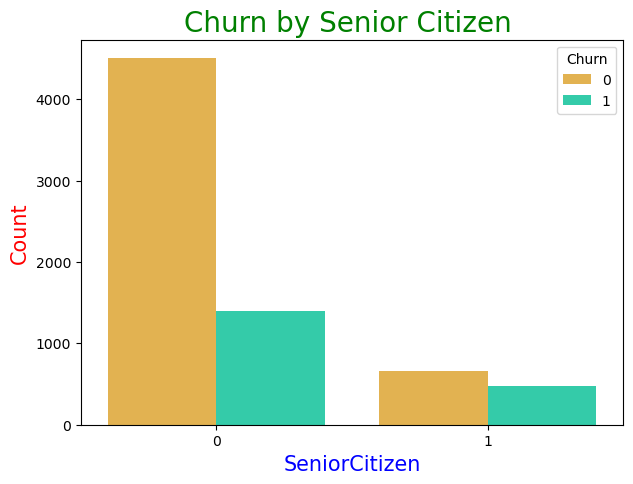

In [53]:
plt.figure(figsize=(7,5))
sns.countplot(x= "SeniorCitizen", data= df ,palette="turbo_r", hue="Churn")
plt.xlabel("SeniorCitizen", fontsize= 15, c = "b")
plt.ylabel("Count", fontsize= 15, c = "r")
plt.title("Churn by Senior Citizen ", fontsize = 20, c= "g")
plt.show()

In [ ]:
Here we can see Senior Citizen has low churn

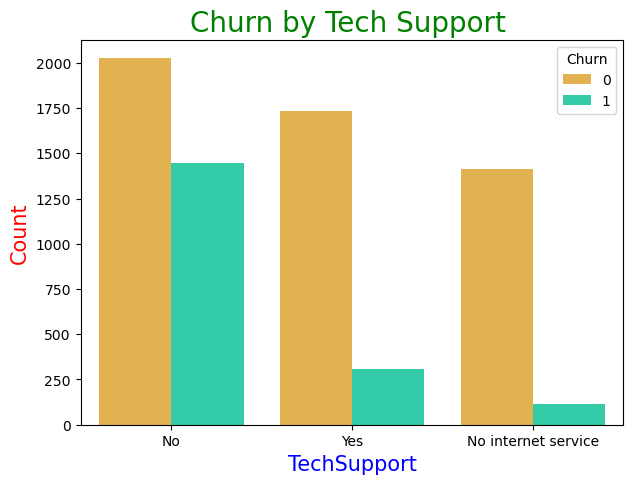

In [54]:
plt.figure(figsize=(7,5))
sns.countplot(x= "TechSupport", data= df ,palette="turbo_r", hue="Churn")
plt.xlabel("TechSupport", fontsize= 15, c = "b")
plt.ylabel("Count", fontsize= 15, c = "r")
plt.title("Churn by Tech Support ", fontsize = 20, c= "g")
plt.show()

In [ ]:
No Tech support category has high Churn 

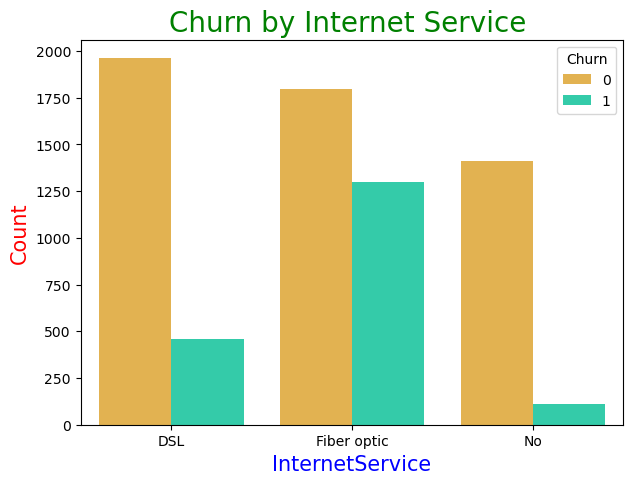

In [55]:
plt.figure(figsize=(7,5))
sns.countplot(x= "InternetService", data= df ,palette="turbo_r", hue="Churn")
plt.xlabel("InternetService", fontsize= 15, c = "b")
plt.ylabel("Count", fontsize= 15, c = "r")
plt.title("Churn by Internet Service ", fontsize = 20, c= "g")
plt.show()

In [ ]:
No Internet service has low churn

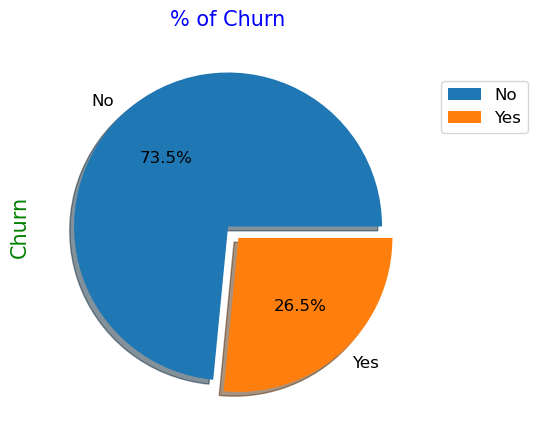

Churn
0    5174
1    1869
Name: count, dtype: int64

In [56]:
ax = (df['Churn'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12, explode = (0, 0.1), shadow=True )                                                                           
ax.set_ylabel('Churn',fontsize = 15, c = "g")
ax.set_title('% of Churn', fontsize = 15, c= "b")
plt.legend(loc='upper right', bbox_to_anchor =(1.3,0.9), fontsize=12)
plt.show()
df.Churn.value_counts()

Here we can see Churn is 26.5% and No Churn is 73.5%. Data is imbalance.

In [ ]:
Label Encoding of Target Column

In [59]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

In [60]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [61]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [62]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [63]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder

# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)


In [64]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [65]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
Traianing and test data split

In [66]:
# splitting the features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [67]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
y_train.shape

(5634,)

In [72]:
X_train.shape

(5634, 19)

In [74]:
y_train.value_counts()

Churn
0    4138
1    1496
Name: count, dtype: int64

In [ ]:
Synthetic Minority Oversampling TEchnique (SMOTE)

In [79]:
smote = SMOTE(random_state=42)

In [81]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [82]:
print(y_train_smote.shape)

(8276,)


In [83]:
y_train_smote.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

In [ ]:
Building a Model

In [84]:
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [85]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.78
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.83
----------------------------------------------------------------------


In [86]:
cv_scores

{'Decision Tree': array([0.69202899, 0.70574018, 0.82537764, 0.83806647, 0.84350453]),
 'Random Forest': array([0.73067633, 0.77039275, 0.90392749, 0.89969789, 0.90030211]),
 'XGBoost': array([0.70833333, 0.76132931, 0.90453172, 0.88821752, 0.90755287])}

In [ ]:
Random Forest gives the highest accuracy compared to other models with default parameters

In [89]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [90]:
y_test.value_counts()

Churn
0    1036
1     373
Name: count, dtype: int64

In [ ]:
Model Evaluation

In [91]:
# evaluate on test data
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confsuion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.7785663591199432
Confsuion Matrix:
 [[878 158]
 [154 219]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [92]:
# save the trained model as a pickle file
model_data = {"model": rfc, "features_names": X.columns.tolist()}


with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

In [ ]:
 Load the saved model and build a Predictive System

In [93]:
# load teh saved model and the feature names

with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [94]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [95]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [96]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}


input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)


# encode categorical featires using teh saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

[0]
Prediction: No Churn
Prediciton Probability: [[0.79 0.21]]


In [97]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [ ]:
Logistic Regression Model

In [102]:
log_reg=LogisticRegression()
log_reg.fit(X_train_smote,y_train_smote)
y_train_pred=log_reg.predict(X_train_smote)
y_test_pred=log_reg.predict(X_test)

In [104]:
accuracy = accuracy_score(y_train_smote, y_train_pred)
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

In [106]:
accuracy = accuracy_score(y_train_smote, y_train_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 78.99%


In [107]:
print(conf_matrix)

[[785 251]
 [ 83 290]]


In [109]:
print(class_report)

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1036
           1       0.54      0.78      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



In [ ]:
Random Forest Model

In [110]:
rf=RandomForestClassifier()
rf.fit(X_train_smote,y_train_smote)
y_train_pred=rf.predict(X_train_smote)
y_test_pred=rf.predict(X_test)

In [111]:
accuracy = accuracy_score(y_test, y_test_pred)

In [112]:
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

Random Forest Accuracy: 77.71%


In [ ]:
Hyperparameter Tuning

In [126]:
from sklearn.model_selection import GridSearchCV

In [128]:
param_grid = {'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [129]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=0.1)


In [131]:
grid_predictions = grid.predict(X_test)

In [132]:
confusion_matrix(y_test, grid_predictions)

array([[982,  54],
       [270, 103]], dtype=int64)

In [133]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1036
           1       0.66      0.28      0.39       373

    accuracy                           0.77      1409
   macro avg       0.72      0.61      0.62      1409
weighted avg       0.75      0.77      0.73      1409



In [ ]:
Model Evaluation
we have used Hyperparameter tuning
overall accuracy of 77% 
recall is 95% and precision=78%

Retention Plan
We should focus on below
Churn is high when Monthly Charges are high.
Churn is high at starting tenure 
People have partners are less churn.
In Electronic check payment have high churn.
Month to Month contract has high churn
Senior Citizen has low churn
No Tech support category has high Churn 
No Internet service has low churn